In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual general para publicación
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300
})

In [2]:
df=pd.read_csv('datos_cursos.csv')

df.head()

,Facultad,Carrera,Día,H_Inicio,H_Salida,Año_Inicio,Año_Fin,Total Estudiantes,Proyecto,Entrada,Salida,Profesor
0,ICA,CIVIL,JUEVES,7,9,2020,2020,63,1,7,15,DOC_05
1,ICA,CIVIL,MIERCOLES,7,9,2020,2020,68,1,7,15,DOC_05
2,ICA,COMPUTACION,JUEVES,11,13,2020,2020,17,1,7,15,DOC_11
3,FILO,P INFORMATICA,VIERNES,8,10,2020,2020,6,1,7,15,DOC_11
4,ARQ,ARQUITECTURA,MARTES,7,9,2020,2020,19,1,7,15,DOC_12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Facultad           747 non-null    object
 1   Carrera            747 non-null    object
 2   Día                747 non-null    object
 3   H_Inicio           747 non-null    int64 
 4   H_Salida           747 non-null    int64 
 5   Año_Inicio         747 non-null    int64 
 6   Año_Fin            747 non-null    int64 
 7   Total Estudiantes  747 non-null    int64 
 8   Proyecto           747 non-null    int64 
 9   Entrada            747 non-null    int64 
 10  Salida             747 non-null    int64 
 11  Profesor           747 non-null    object
dtypes: int64(8), object(4)
memory usage: 70.2+ KB


In [4]:
#Dividimos el df para entrenamiento y validacion

# Entrenamiento: Año_Fin menor a 2024
# df_train = df[df["Año_Fin"] < 2024].copy()

df_train = df[(df["Año_Inicio"] == 2024) & (df["Año_Fin"] == 2024)].copy()

# Validación: Año_Fin igual a 2024 (para semestre 2024–2025)
df_val = df[df["Año_Fin"] == 2024].copy()

In [5]:
df_val['Profesor']

,Profesor
383,DOC_02
384,DOC_02
385,DOC_02
386,DOC_02
387,DOC_04
...,...
742,DOC_09
743,DOC_09
744,DOC_09
745,DOC_09


In [6]:
from sklearn.preprocessing import StandardScaler

# 1. Seleccionar columnas categóricas y numéricas
columnas_categoricas = ['Facultad',
                        'Carrera',
                        'Día']
columnas_numericas = ['H_Inicio',
                      'H_Salida',
                      'Año_Inicio',
                      'Año_Fin',
                      'Total Estudiantes',
                      'Proyecto',
                      'Entrada',
                      'Salida']

# 2. Aplicar One-Hot Encoding a las categóricas
df_categoricas = pd.get_dummies(df_train[columnas_categoricas], drop_first=True)

# 3. Normalizar las numéricas
scaler = StandardScaler()
df_numericas = pd.DataFrame(scaler.fit_transform(df_train[columnas_numericas]),
                            columns=columnas_numericas,
                            index=df_train.index)

# 4. Combinar los datos preprocesados
df_preprocesado = pd.concat([df_numericas, df_categoricas], axis=1)

# 5. Guardar por separado el nombre de cada fila (por ejemplo, Profesor) para análisis posterior
profesores_train = df_train['Profesor'].reset_index(drop=True)

Text(0, 0.5, 'Varianza explicada acumulada')

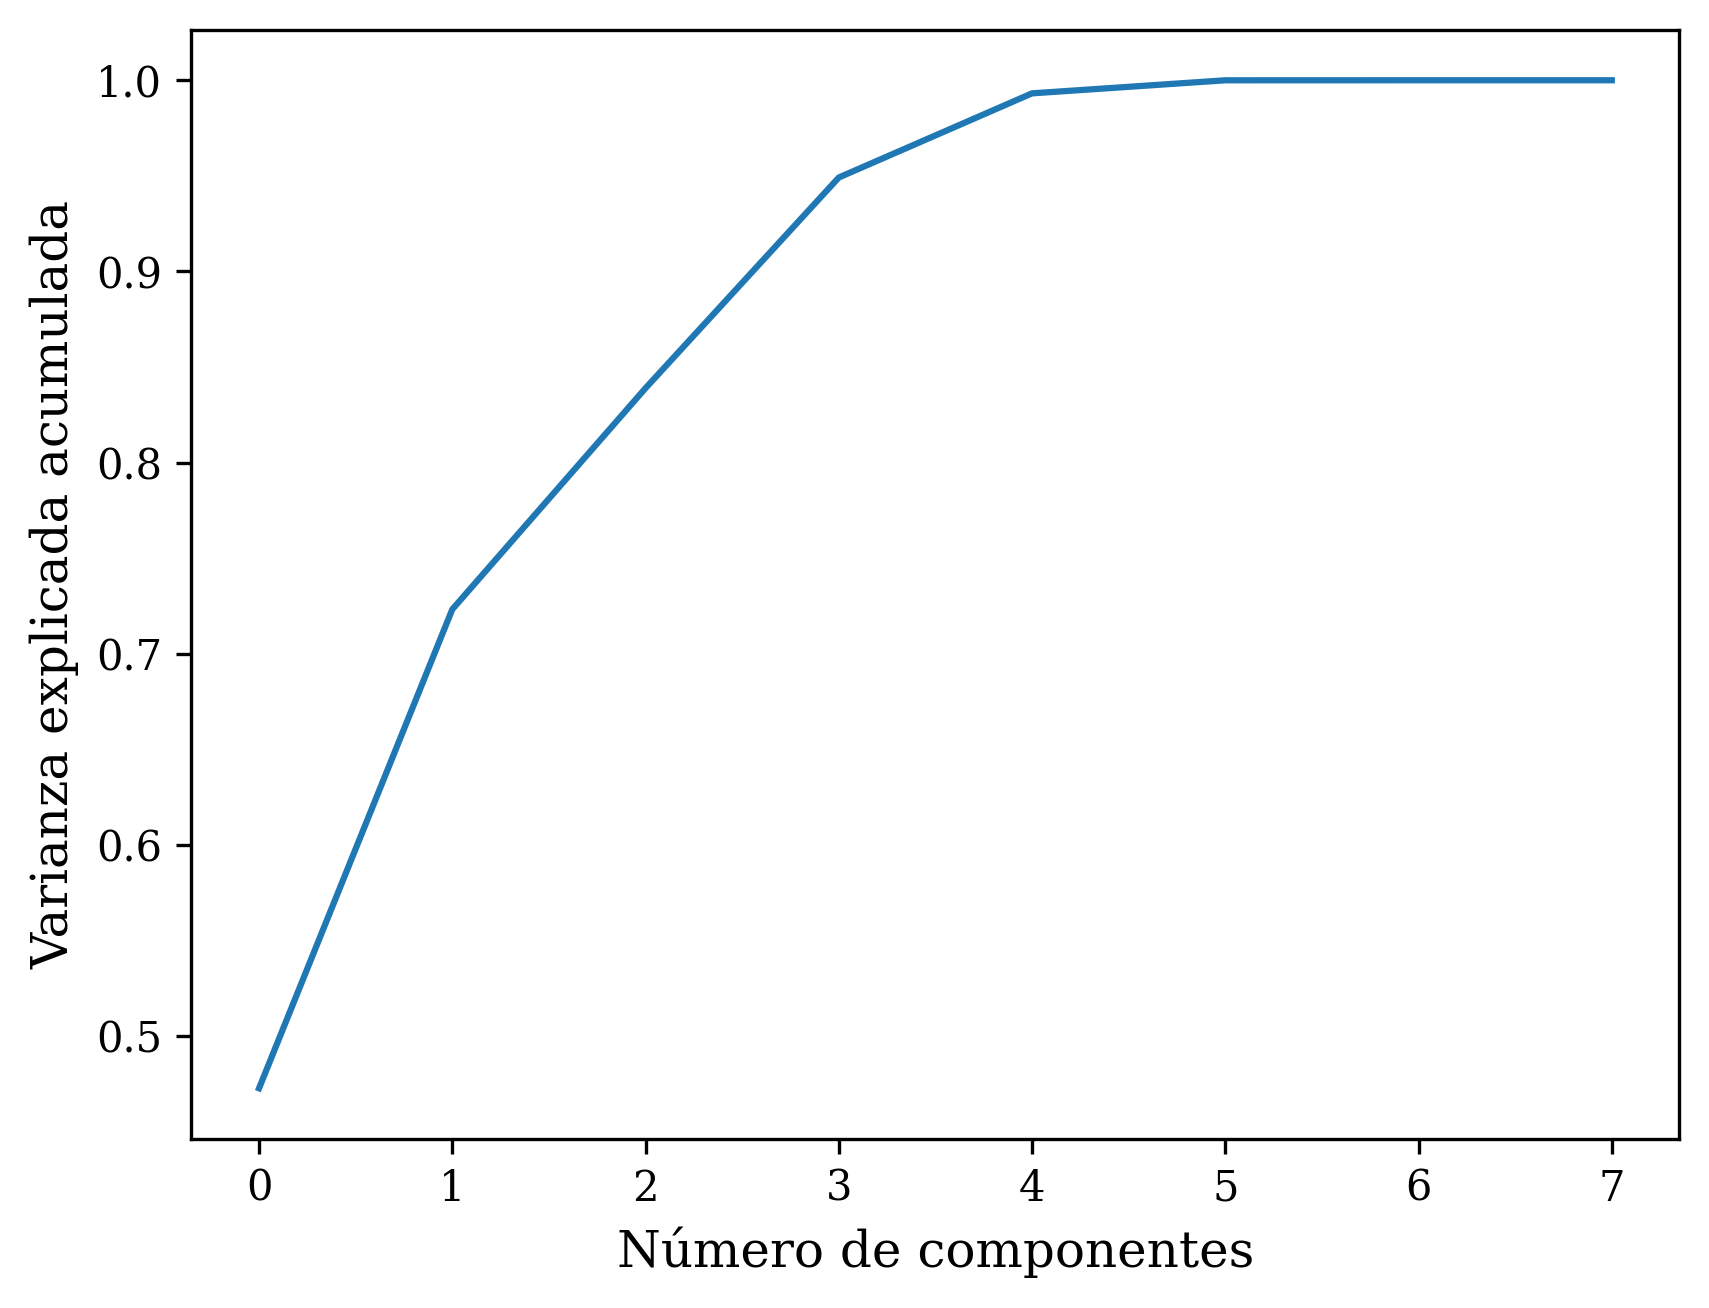

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Seleccionar las columnas numéricas

X = df[columnas_numericas].dropna()
X_scaled = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')

In [8]:
componentes = pd.DataFrame(
    pca.components_,
    columns=columnas_numericas,
    index=[f'PC{i+1}' for i in range(len(columnas_numericas))]
)

print(componentes.T)  # Transpuesta para ver más fácilmente qué aporta a cada componente

                        PC1       PC2       PC3       PC4       PC5       PC6  \
H_Inicio           0.454376  0.003763  0.129664  0.447918 -0.275206  0.004612   
H_Salida           0.454184  0.003790  0.129329  0.448803 -0.275419  0.004753   
Año_Inicio        -0.035735  0.685668  0.164054 -0.028750 -0.007180  0.707666   
Año_Fin           -0.040531  0.684014  0.175385 -0.019124 -0.018160 -0.706418   
Total Estudiantes -0.063726 -0.244924  0.946157 -0.201555  0.008395  0.006647   
Proyecto          -0.335586 -0.011681  0.116248  0.692223  0.628137  0.001918   
Entrada            0.483560  0.030262 -0.005561 -0.196159  0.476129 -0.006752   
Salida             0.483560  0.030262 -0.005561 -0.196159  0.476129 -0.006752   

                        PC7           PC8  
H_Inicio           0.707337 -1.126288e-12  
H_Salida          -0.706877  1.125446e-12  
Año_Inicio         0.000032  2.594051e-16  
Año_Fin           -0.000103 -2.148754e-16  
Total Estudiantes -0.000347  5.310085e-16  
Proyec

In [9]:
df_preprocesado.head()

,H_Inicio,H_Salida,Año_Inicio,Año_Fin,Total Estudiantes,Proyecto,Entrada,Salida,Facultad_ARQ,Facultad_CIENCIAS,...,Carrera_MINAS,Carrera_P INFORMATICA,Carrera_P MATEMATICA,Carrera_PETROLEOS,Carrera_QUIMICA,Carrera_S INFORMACION,Día_LUNES,Día_MARTES,Día_MIERCOLES,Día_VIERNES
450,-0.673376,-0.673376,0.0,0.0,1.204345,0.902194,-0.704833,-0.704833,False,False,...,False,False,False,False,False,True,False,False,False,False
451,-0.673376,-0.673376,0.0,0.0,0.493763,0.902194,-0.704833,-0.704833,False,False,...,False,False,False,False,False,False,True,False,False,False
452,-0.673376,-0.673376,0.0,0.0,0.422705,0.902194,-0.704833,-0.704833,False,False,...,False,False,False,False,False,False,False,True,False,False
453,0.022297,0.022297,0.0,0.0,0.351647,0.902194,-0.704833,-0.704833,True,False,...,False,False,False,False,False,False,False,True,False,False
454,-0.325539,-0.325539,0.0,0.0,-0.572109,0.902194,-0.704833,-0.704833,False,False,...,False,False,False,False,False,False,False,False,True,False


In [10]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# KMeans
# kmeans = KMeans(n_clusters=14, random_state=42, n_init=10)

kmeans = KMeans(
    n_clusters=14,
    init='k-means++',
    n_init=20,
    max_iter=500,
    tol=1e-5,
    random_state=42,
    algorithm='elkan'
)

labels_kmeans = kmeans.fit_predict(df_preprocesado)
s_kmeans = silhouette_score(df_preprocesado, labels_kmeans)
c_kmeans = calinski_harabasz_score(df_preprocesado, labels_kmeans)

# DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=2)
labels_dbscan = dbscan.fit_predict(df_preprocesado)
if len(set(labels_dbscan)) > 1 and -1 in labels_dbscan:
    mask = labels_dbscan != -1
    s_dbscan = silhouette_score(df_preprocesado[mask], labels_dbscan[mask])
    c_dbscan = calinski_harabasz_score(df_preprocesado[mask], labels_dbscan[mask])
else:
    s_dbscan = float('-inf')
    c_dbscan = float('-inf')

# Agglomerative Clustering
# agglo = AgglomerativeClustering(n_clusters=14)

agglo = AgglomerativeClustering(
    n_clusters=14,
    metric='manhattan',
    linkage='average'
)

labels_agglo = agglo.fit_predict(df_preprocesado)
s_agglo = silhouette_score(df_preprocesado, labels_agglo)
c_agglo = calinski_harabasz_score(df_preprocesado, labels_agglo)

# Spectral Kluster
# spectral = SpectralClustering(n_clusters=14, assign_labels='kmeans', random_state=42)

spectral = SpectralClustering(
    n_clusters=14,
    affinity='nearest_neighbors',
    n_neighbors=9,
    assign_labels='kmeans',
    random_state=42
)

labels_spectral = spectral.fit_predict(df_preprocesado)
s_spectral = silhouette_score(df_preprocesado, labels_spectral)
c_spectral = calinski_harabasz_score(df_preprocesado, labels_spectral)

# --- Mostrar métricas de todos los modelos antes de elegir ---
print("=== MÉTRICAS DE CLUSTERING ===")
print(f"KMeans - Silhouette: {s_kmeans:.4f}, Calinski-Harabasz: {c_kmeans:.2f}")
print(f"DBSCAN - Silhouette: {s_dbscan:.4f}, Calinski-Harabasz: {c_dbscan:.2f}")
print(f"Agglomerative - Silhouette: {s_agglo:.4f}, Calinski-Harabasz: {c_agglo:.2f}")
print(f"Spectral Kluster - Silhouette: {s_spectral:.4f}, Calinski-Harabasz: {c_spectral:.2f}")

=== MÉTRICAS DE CLUSTERING ===
KMeans - Silhouette: 0.1765, Calinski-Harabasz: 13.60
DBSCAN - Silhouette: 0.2514, Calinski-Harabasz: 10.03
Agglomerative - Silhouette: 0.1397, Calinski-Harabasz: 10.64
Spectral Kluster - Silhouette: 0.1615, Calinski-Harabasz: 13.83


In [11]:
from collections import Counter

# Contar cuántos puntos hay en cada cluster
conteo_clusters_dbscan = Counter(labels_dbscan)

n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

print("Distribución de puntos por cluster (DBSCAN):")
print(conteo_clusters_dbscan)
print(f"Número total de clusters (DBSCAN): {n_clusters}")

Distribución de puntos por cluster (DBSCAN):
Counter({np.int64(-1): 24, np.int64(1): 21, np.int64(0): 5, np.int64(4): 4, np.int64(2): 3, np.int64(12): 3, np.int64(3): 2, np.int64(5): 2, np.int64(6): 2, np.int64(7): 2, np.int64(8): 2, np.int64(9): 2, np.int64(10): 2, np.int64(11): 2, np.int64(13): 2})
Número total de clusters (DBSCAN): 14


/tmp/ipython-input-12-160426032.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipython-input-12-160426032.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


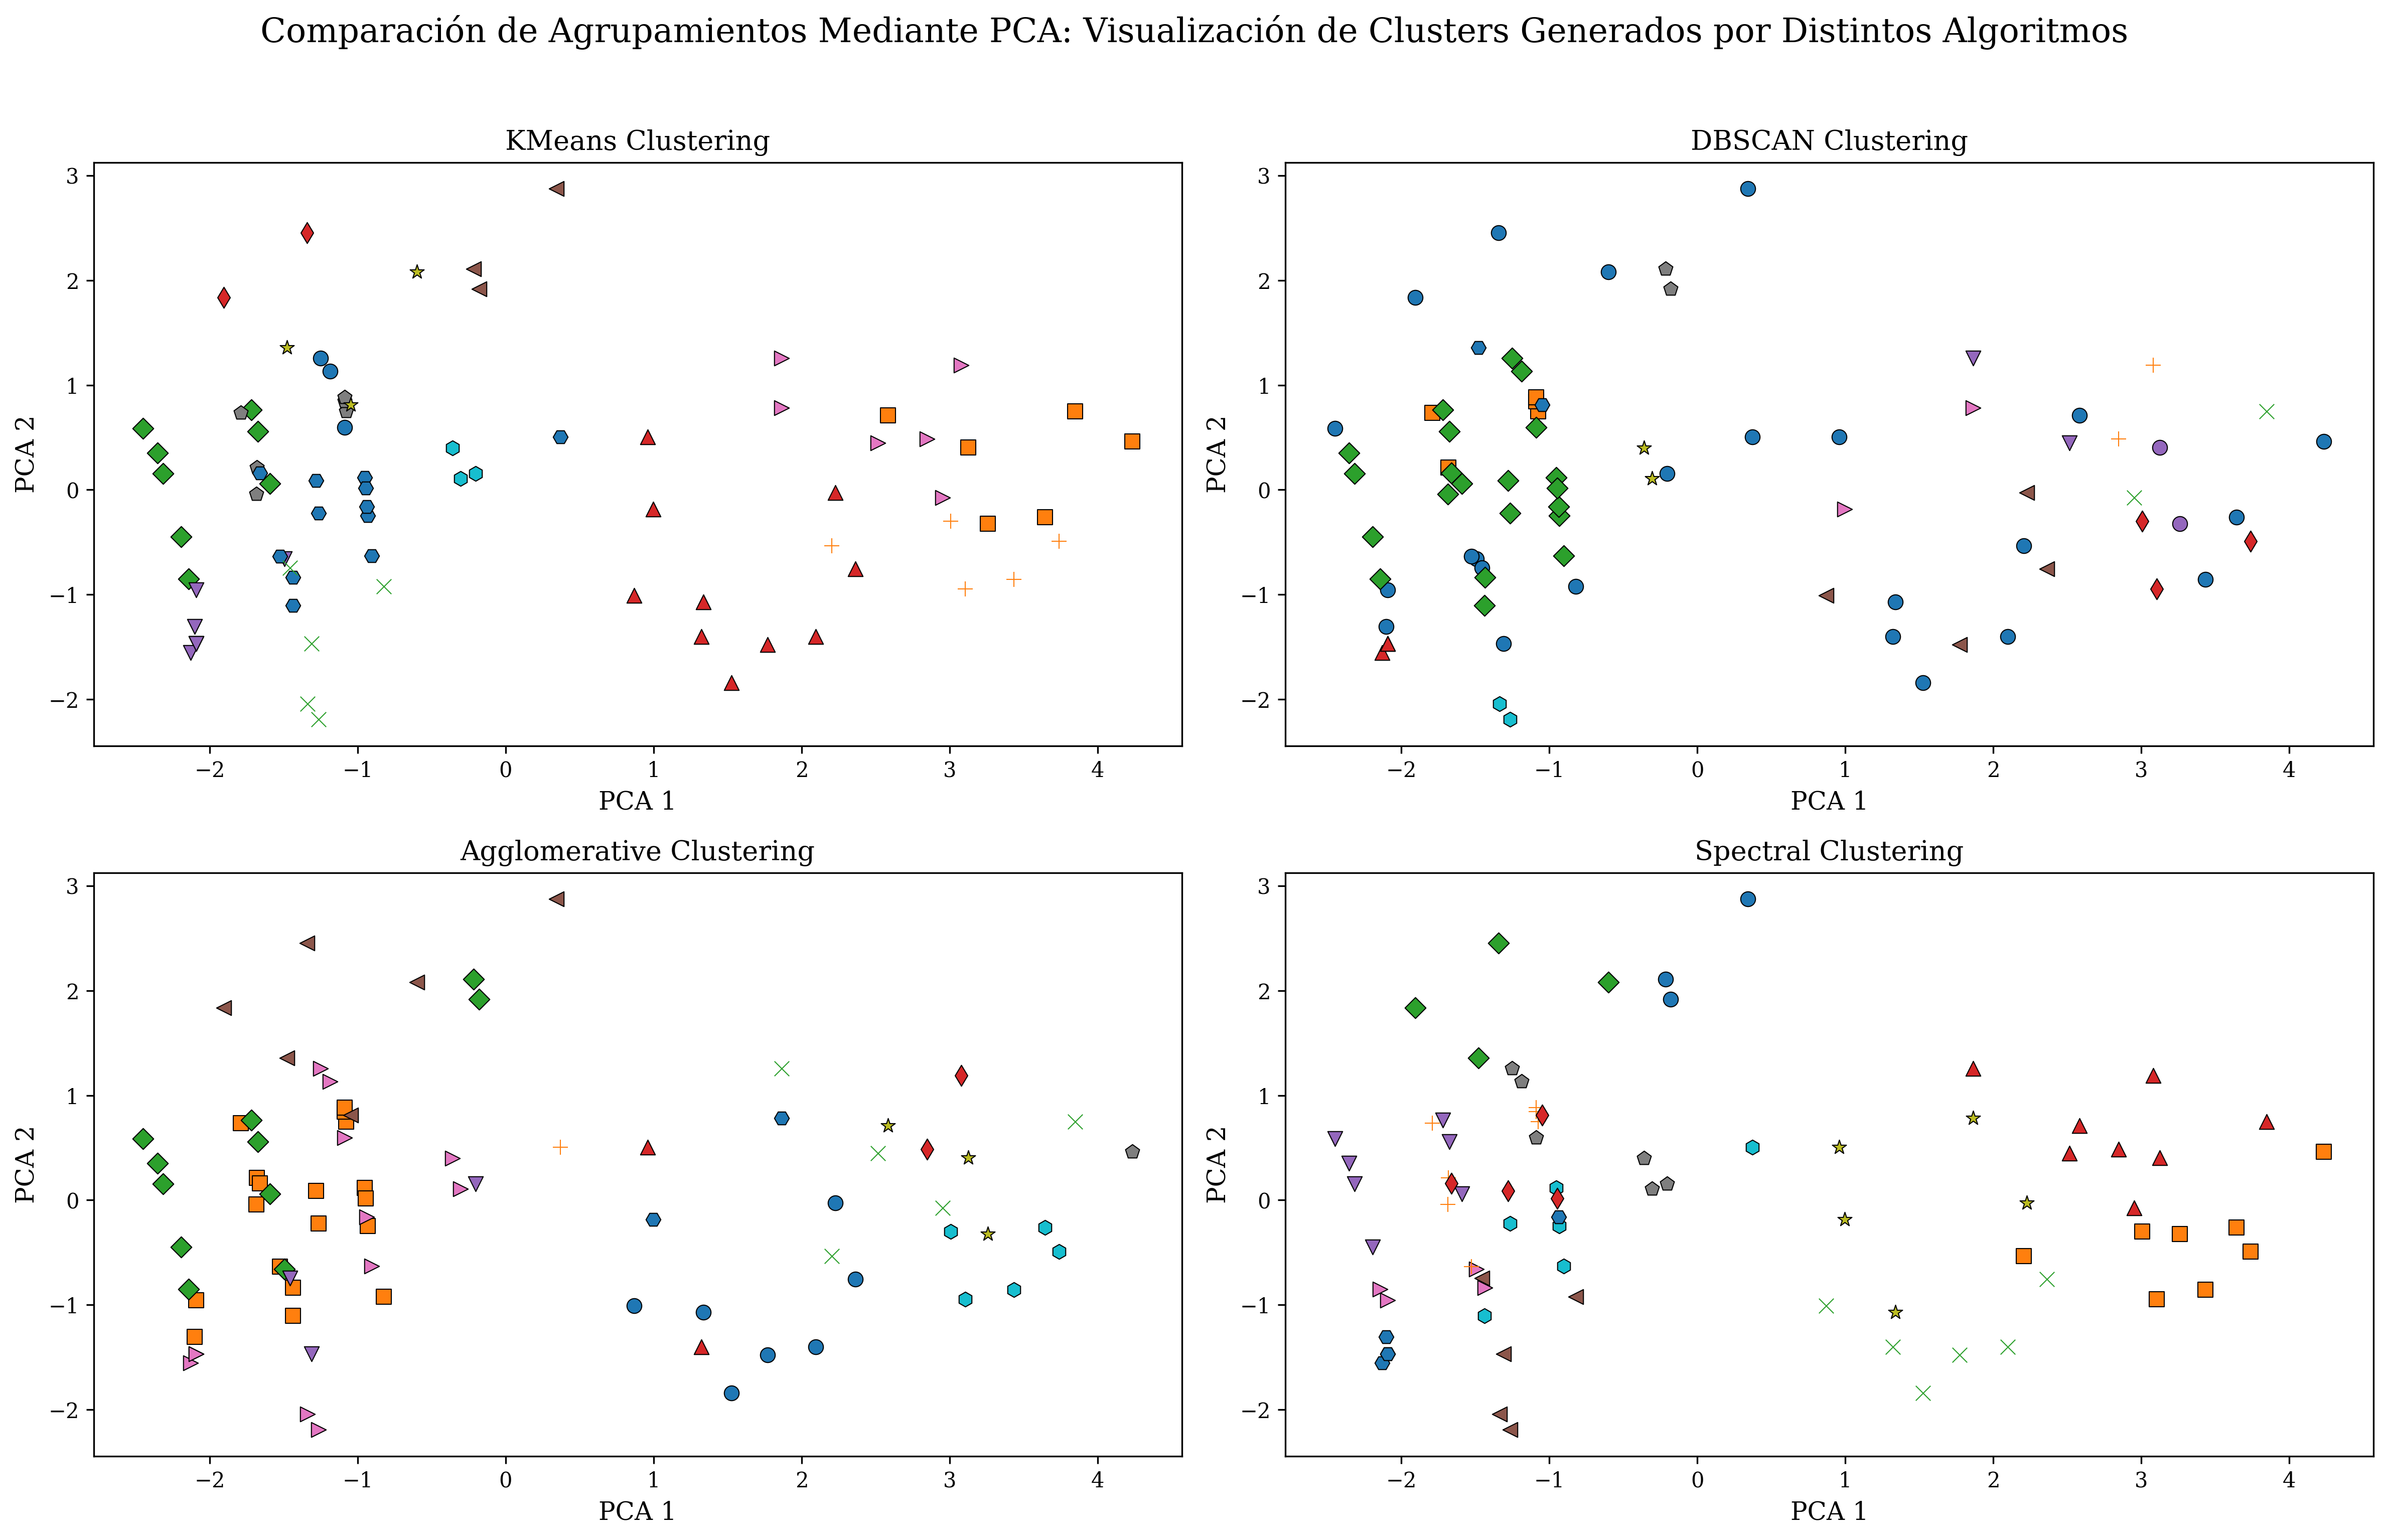

In [12]:
# Reducimos a 2D para visualización
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(df_preprocesado)

# Lista de marcadores diferentes (hasta 14 distintos)
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd']

def plot_clusters(ax, labels, title):
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = np.unique(labels)

    for i, label in enumerate(unique_labels):
        # asignar color y marcador distinto
        marker = markers[i % len(markers)]
        color = f'C{i % 10}'  # usa los 10 colores por defecto

        mask = labels == label
        ax.scatter(
            pca_resultado[mask, 0], pca_resultado[mask, 1],
            marker=marker, label=f'Cluster {label}',
            c=color, s=50, edgecolor='k', linewidth=0.5
        )

    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    # ax.legend(fontsize=8, loc='best')

# Visualización de clusters
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

plot_clusters(axs[0, 0], labels_kmeans, 'KMeans Clustering')
plot_clusters(axs[0, 1], labels_dbscan, 'DBSCAN Clustering')
plot_clusters(axs[1, 0], labels_agglo, 'Agglomerative Clustering')
plot_clusters(axs[1, 1], labels_spectral, 'Spectral Clustering')

fig.suptitle("Comparación de Agrupamientos Mediante PCA: Visualización de Clusters Generados por Distintos Algoritmos", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
# Crear copia del DataFrame original (ajusta si ya lo tienes cargado)
df_original = df_train.copy()

# Asignar las etiquetas de cada modelo al DataFrame
df_original['Cluster_KMeans'] = labels_kmeans
df_original['Cluster_DBSCAN'] = labels_dbscan
df_original['Cluster_Agglo'] = labels_agglo
df_original['Cluster_Spectral'] = labels_spectral

In [14]:
# print("Distribución por cluster - KMeans")
# print(df_original['Cluster_KMeans'].value_counts().sort_index())

# print("\nDistribución por cluster - DBSCAN")
# print(df_original['Cluster_DBSCAN'].value_counts().sort_index())

# print("\nDistribución por cluster - Agglomerative")
# print(df_original['Cluster_Agglo'].value_counts().sort_index())

# print("\nDistribución por cluster - Spectral")
# print(df_original['Cluster_Spectral'].value_counts().sort_index())

# Crear DataFrame con las distribuciones de cada algoritmo
distribucion_clusters = pd.DataFrame({
    'KMeans': df_original['Cluster_KMeans'].value_counts().sort_index(),
    'DBSCAN': df_original['Cluster_DBSCAN'].value_counts().sort_index(),
    'Agglomerative': df_original['Cluster_Agglo'].value_counts().sort_index(),
    'Spectral': df_original['Cluster_Spectral'].value_counts().sort_index()
})

# Rellenar con ceros si algún cluster no está presente en un modelo
distribucion_clusters = distribucion_clusters.fillna(0).astype(int)

# Mostrar tabla
distribucion_clusters

,KMeans,DBSCAN,Agglomerative,Spectral
-1,0,24,0,0
0,3,5,7,3
1,6,21,18,8
2,8,3,11,4
3,10,2,2,8
4,6,4,3,7
5,3,2,6,5
6,6,2,12,4
7,6,2,1,6
8,3,2,3,5


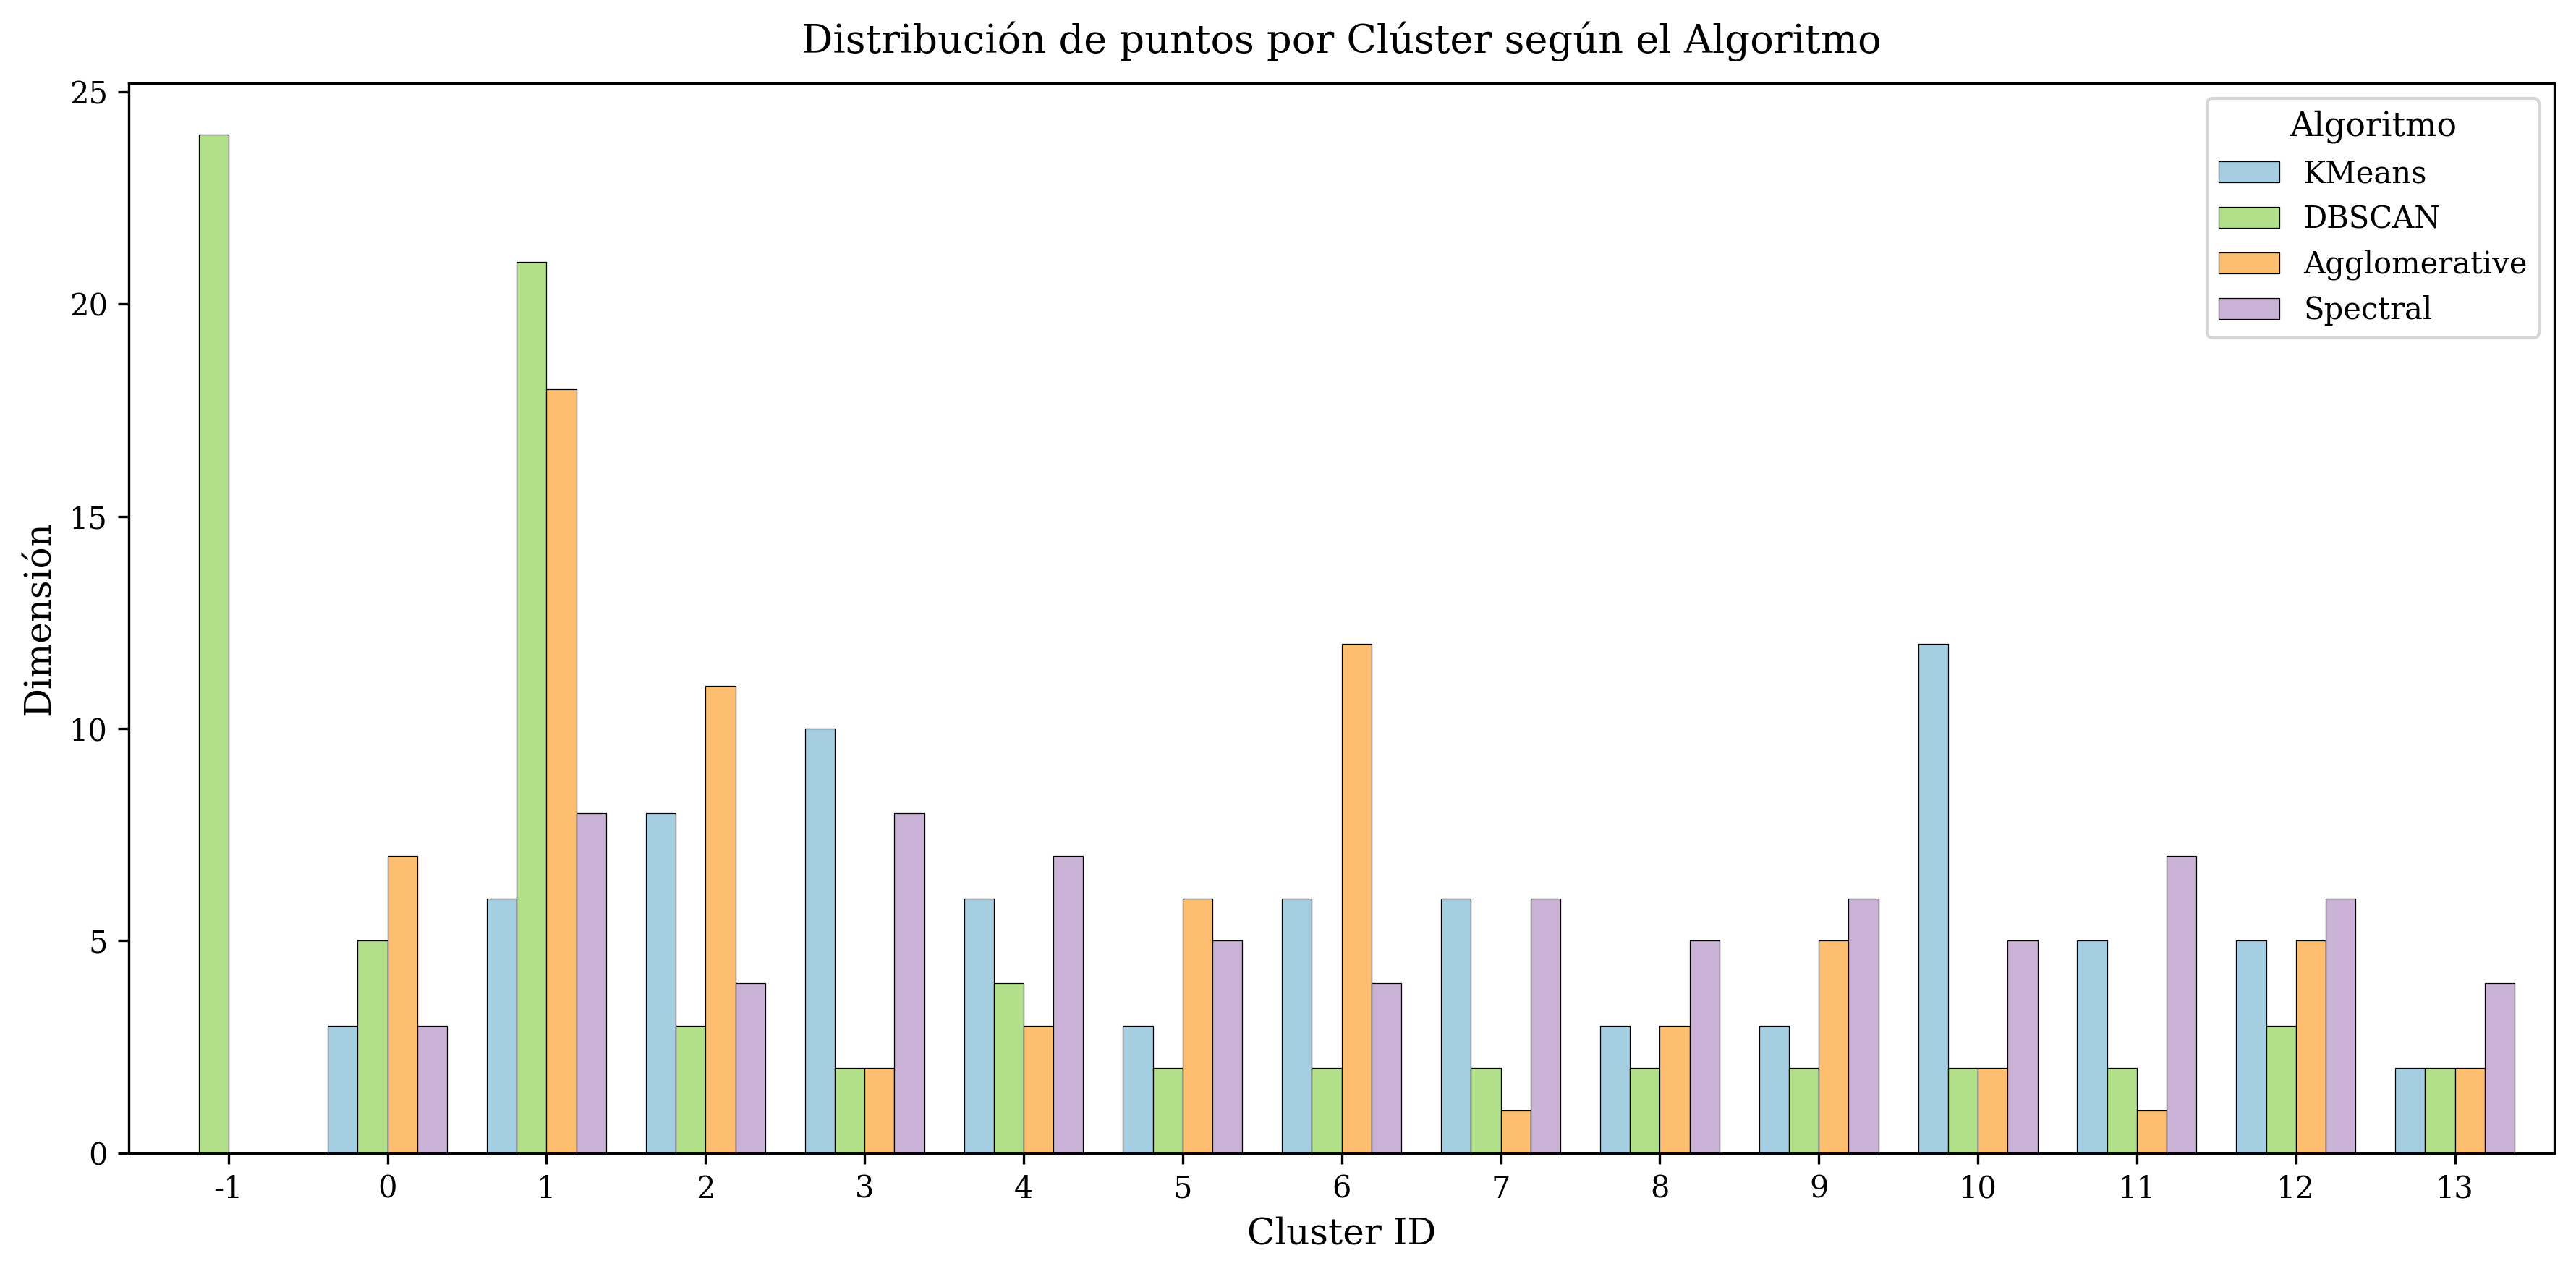

In [15]:
# Crear una copia excluyendo el índice -1 (solo si existe)
distribucion_filtrada = distribucion_clusters.copy()
# if -1 in distribucion_filtrada.index:
#     distribucion_filtrada = distribucion_filtrada.drop(index=-1)

# Colores suaves sugeridos para cada algoritmo
colores_suaves = ['#a6cee3', '#b2df8a', '#fdbf6f', '#cab2d6']

# Crear figura
plt.figure(figsize=(12, 6))

# Dibujar gráfico de barras con colores suaves y mayor ancho
distribucion_filtrada.plot(
    kind='bar',
    color=colores_suaves,
    width=0.75,      # aumentar grosor de barras
    edgecolor='black',
    linewidth=0.3,
    ax=plt.gca()
)

# Estética y etiquetas
plt.title('Distribución de puntos por Clúster según el Algoritmo', pad=10)
plt.xlabel('Cluster ID')
plt.ylabel('Dimensión')
plt.xticks(rotation=0)
plt.legend(title='Algoritmo')
plt.grid(False)  # eliminar grilla completamente

# Ajustar espaciado
plt.tight_layout()
plt.show()

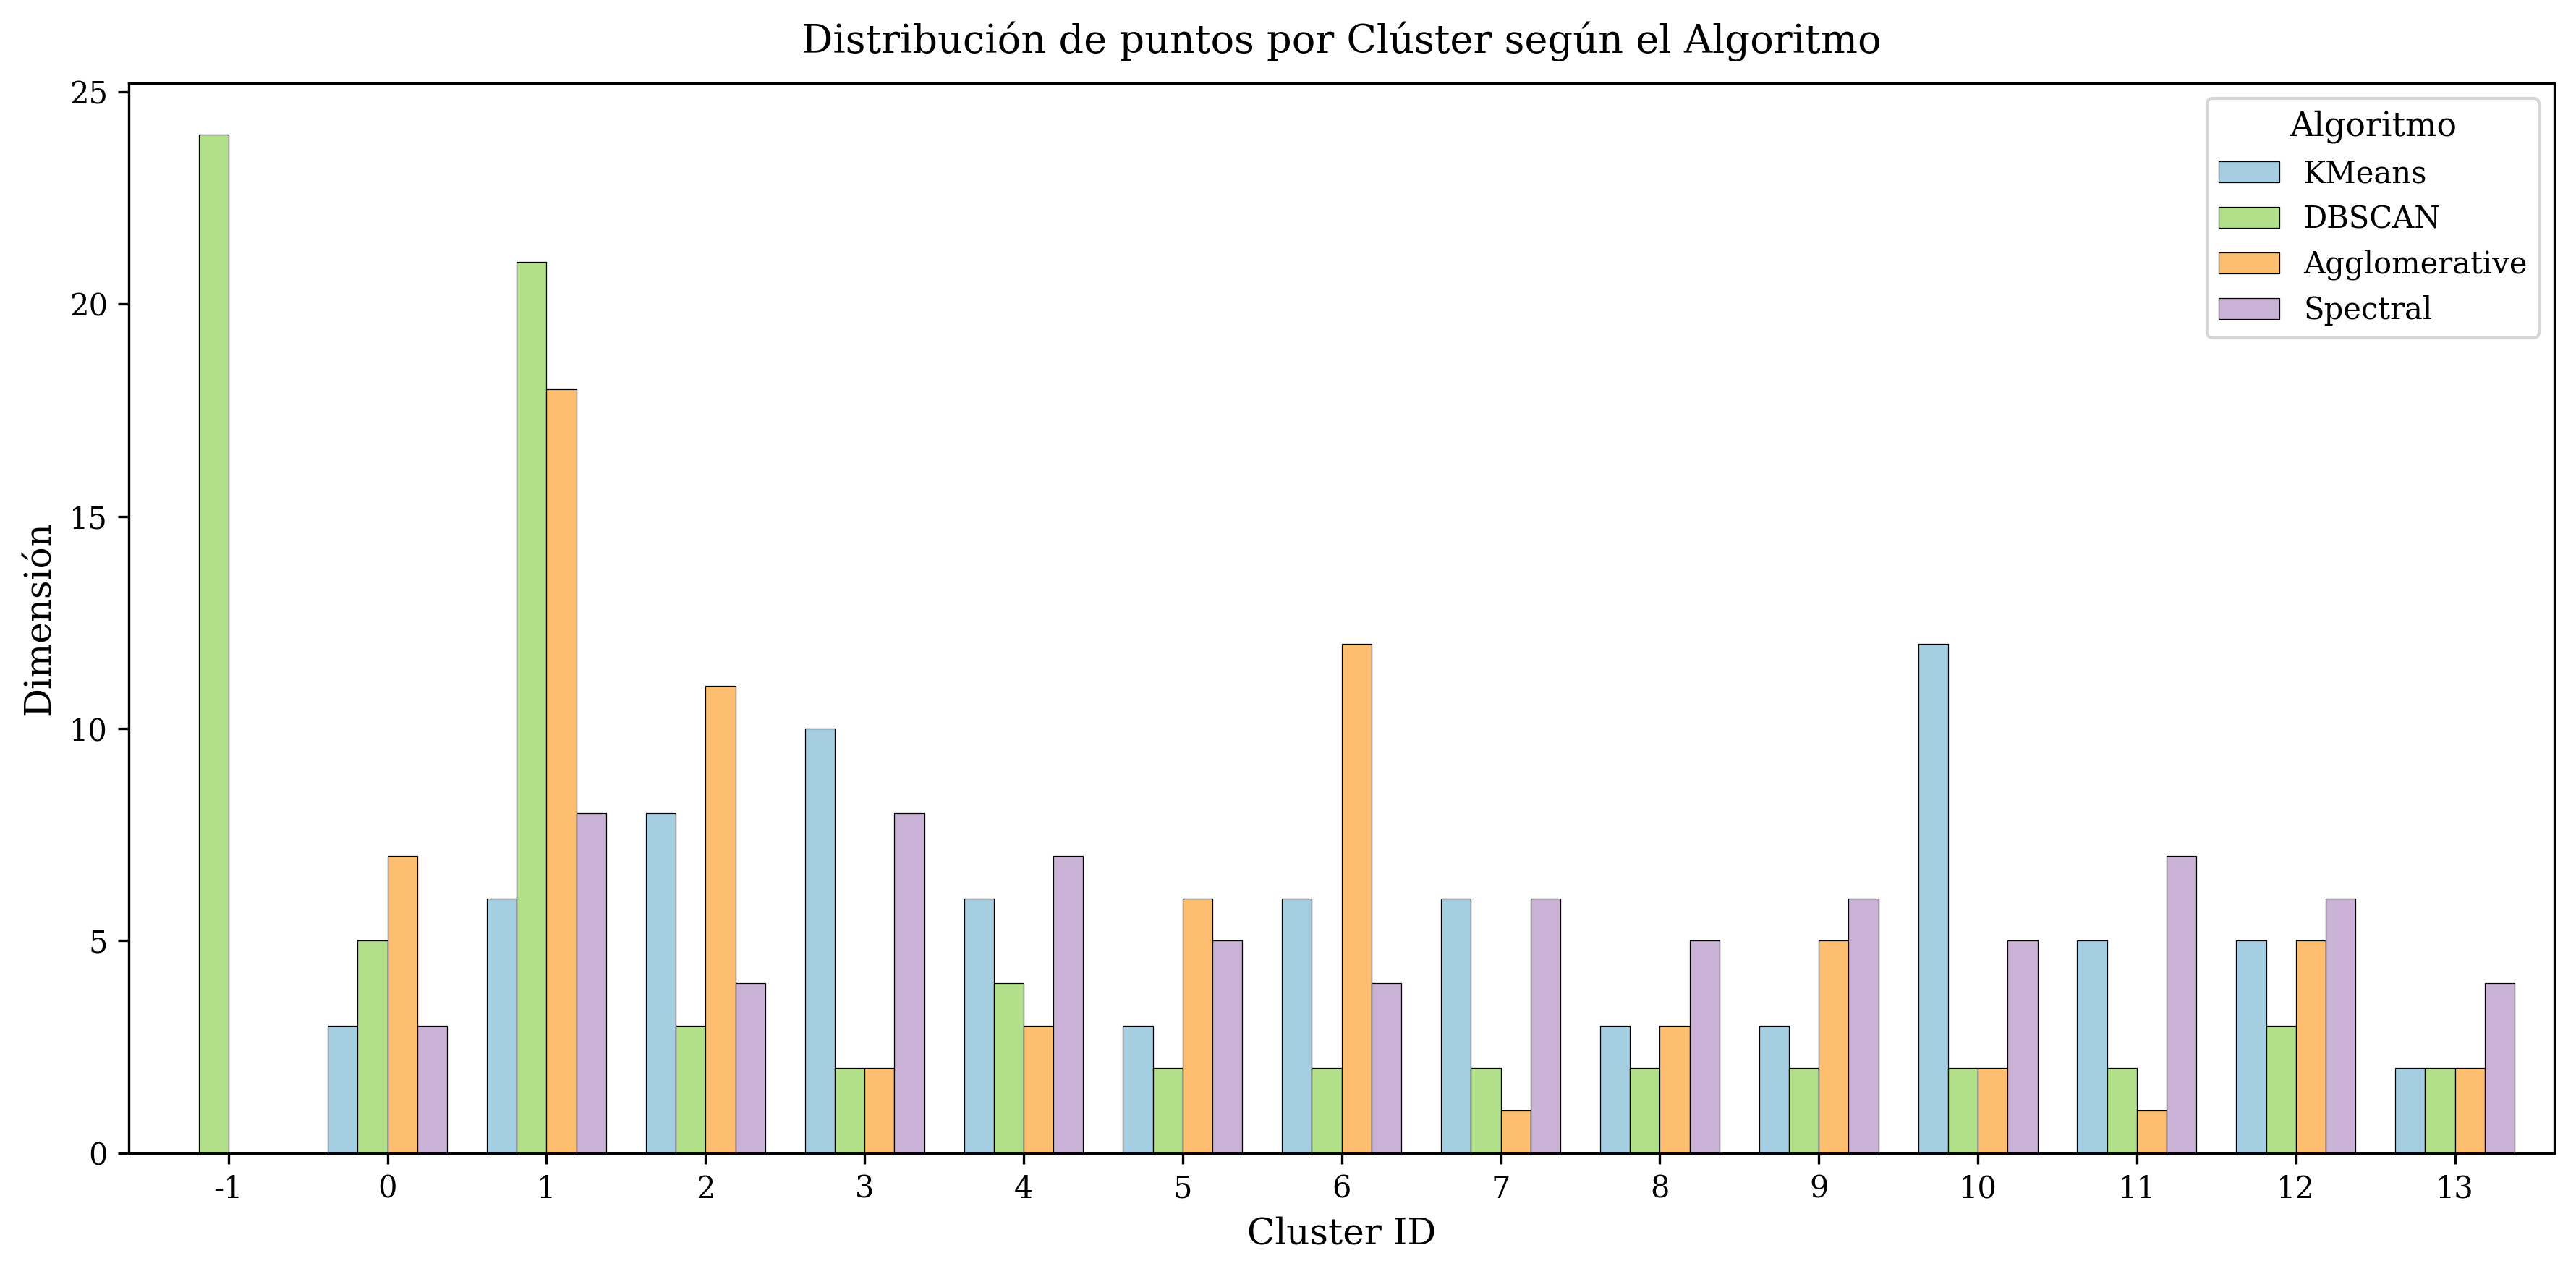

In [22]:
plt.figure(figsize=(12, 6))
distribucion_filtrada.plot(
    kind='bar',
    color=['#a6cee3', '#b2df8a', '#fdbf6f', '#cab2d6'],
    width=0.75,
    edgecolor='black',
    linewidth=0.3,
    ax=plt.gca()
)

plt.title('Distribución de puntos por Clúster según el Algoritmo', pad=10)
plt.xlabel('Cluster ID')
plt.ylabel('Dimensión')
plt.xticks(rotation=0)
plt.ylim(bottom=distribucion_filtrada.min().min() * 0.8)  # Escalar el límite inferior
plt.legend(title='Algoritmo')
plt.grid(False)
plt.tight_layout()
plt.show()


In [16]:
df_original.to_csv('df_kluter.csv', index=False)
df_original.head()

,Facultad,Carrera,Día,H_Inicio,H_Salida,Año_Inicio,Año_Fin,Total Estudiantes,Proyecto,Entrada,Salida,Profesor,Cluster_KMeans,Cluster_DBSCAN,Cluster_Agglo,Cluster_Spectral
450,ICA,S INFORMACION,JUEVES,9,11,2024,2024,53,1,7,15,DOC_02,7,0,1,11
451,ICA,C GRAFICA,LUNES,9,11,2024,2024,43,1,7,15,DOC_02,7,0,1,11
452,IQ,I QUIMICA,MARTES,9,11,2024,2024,42,1,7,15,DOC_02,10,1,1,13
453,ARQ,ARQUITECTURA,MARTES,11,13,2024,2024,41,1,7,15,DOC_02,0,1,6,7
454,AGR,AGRONOMIA,MIERCOLES,10,12,2024,2024,28,1,7,15,DOC_02,10,1,1,9


In [17]:
import pandas as pd
from itertools import combinations

# Filtrar los datos por Cluster_Spectral
df_spectral = df_original.copy()

# 1. Identificar cursos fuera del horario laboral
df_spectral['Fuera_Horario'] = ~(
    (df_spectral['H_Inicio'] >= df_spectral['Entrada']) &
    (df_spectral['H_Salida'] <= df_spectral['Salida'])
)

# 2. Identificar cruces de horario entre cursos asignados al mismo profesor, mismo día
cruces = []

for profesor in df_spectral['Profesor'].unique():
    df_profesor = df_spectral[df_spectral['Profesor'] == profesor]

    for dia in df_profesor['Día'].unique():
        df_dia = df_profesor[df_profesor['Día'] == dia].sort_values('H_Inicio')

        for (idx1, row1), (idx2, row2) in combinations(df_dia.iterrows(), 2):
            if row1['H_Salida'] > row2['H_Inicio'] and row1['H_Inicio'] < row2['H_Salida']:
                cruces.append({
                    'Profesor': profesor,
                    'Día': dia,
                    'Curso 1': idx1,
                    'Curso 2': idx2,
                    'Cruce': True
                })

# Convertir lista de cruces a DataFrame
df_cruces = pd.DataFrame(cruces)

# 3. Generar reporte resumen por docente
df_reporte = df_spectral.groupby('Profesor').agg(
    Cursos_Fuera_Horario=('Fuera_Horario', 'sum'),
    Total_Cursos=('Profesor', 'count')
).reset_index()

# Agregar columna de número de cruces por docente
df_cruces_contadas = df_cruces.groupby('Profesor').size().reset_index(name='Cruces')
df_reporte = df_reporte.merge(df_cruces_contadas, on='Profesor', how='left')
df_reporte['Cruces'] = df_reporte['Cruces'].fillna(0).astype(int)

# Mostrar el reporte final
display(df_reporte)


,Profesor,Cursos_Fuera_Horario,Total_Cursos,Cruces
0,DOC_01,4,7,0
1,DOC_02,0,7,1
2,DOC_03,3,7,0
3,DOC_04,0,8,0
4,DOC_05,1,7,0
5,DOC_06,0,8,1
6,DOC_07,0,8,1
7,DOC_08,0,7,0
8,DOC_09,0,7,0
9,DOC_10,0,8,1


/tmp/ipython-input-18-622807725.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot['Profesor'], rotation=45, ha='right')


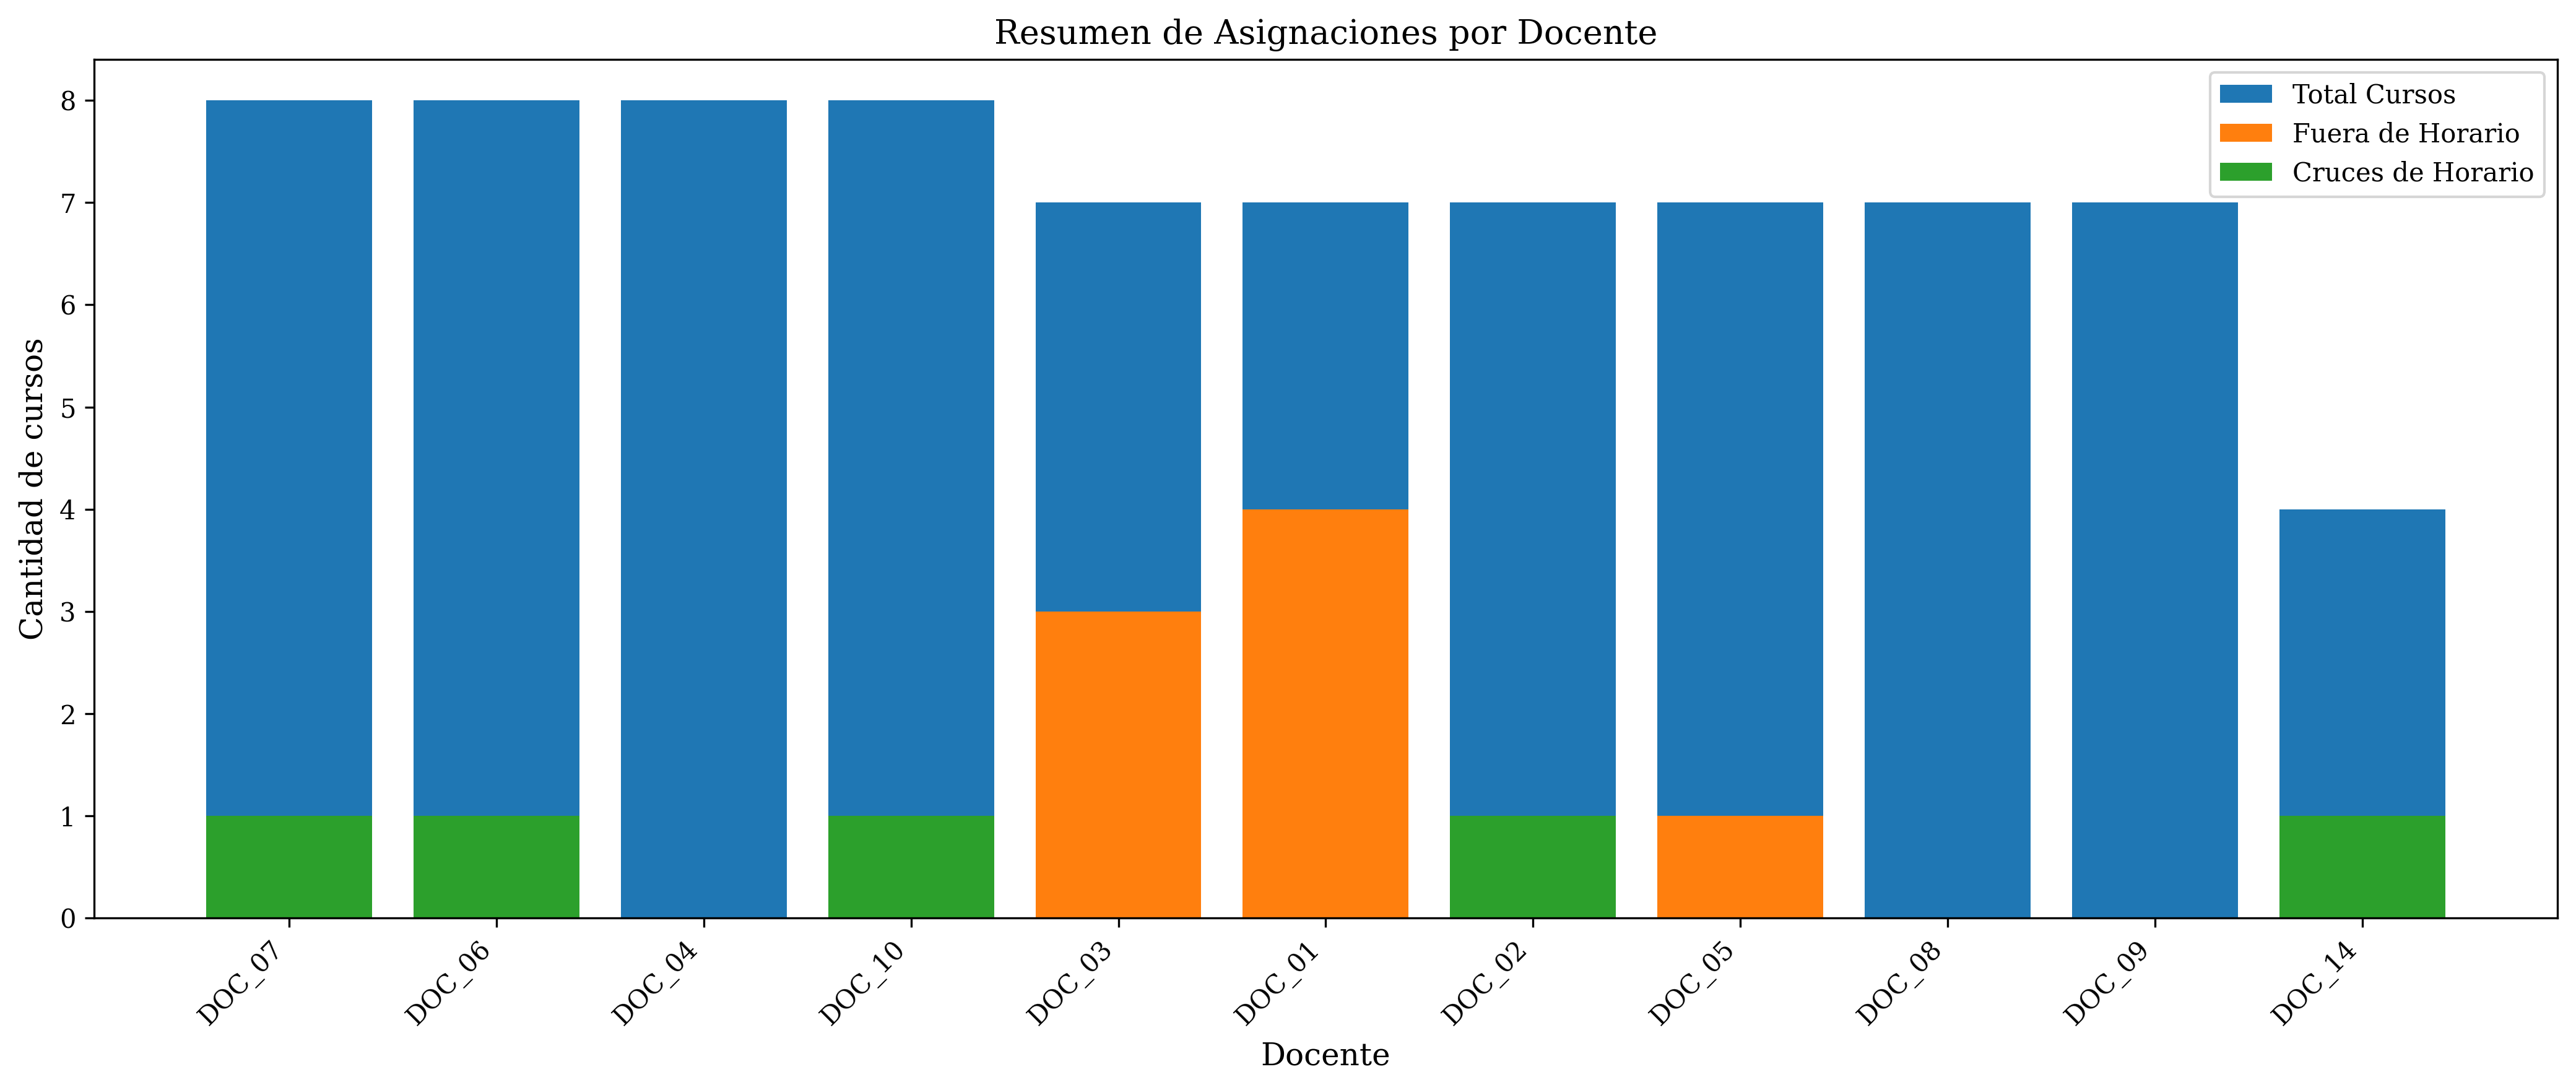

In [18]:
# Asegurar orden por número total de cursos
df_plot = df_reporte.sort_values('Total_Cursos', ascending=False)

profesores = df_plot['Profesor']
x = np.arange(len(profesores))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(df_plot['Profesor'], df_plot['Total_Cursos'], label='Total Cursos')
ax.bar(df_plot['Profesor'], df_plot['Cursos_Fuera_Horario'], label='Fuera de Horario')
ax.bar(df_plot['Profesor'], df_plot['Cruces'], label='Cruces de Horario')

ax.set_xlabel('Docente')
ax.set_ylabel('Cantidad de cursos')
ax.set_title('Resumen de Asignaciones por Docente')
ax.set_xticklabels(df_plot['Profesor'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


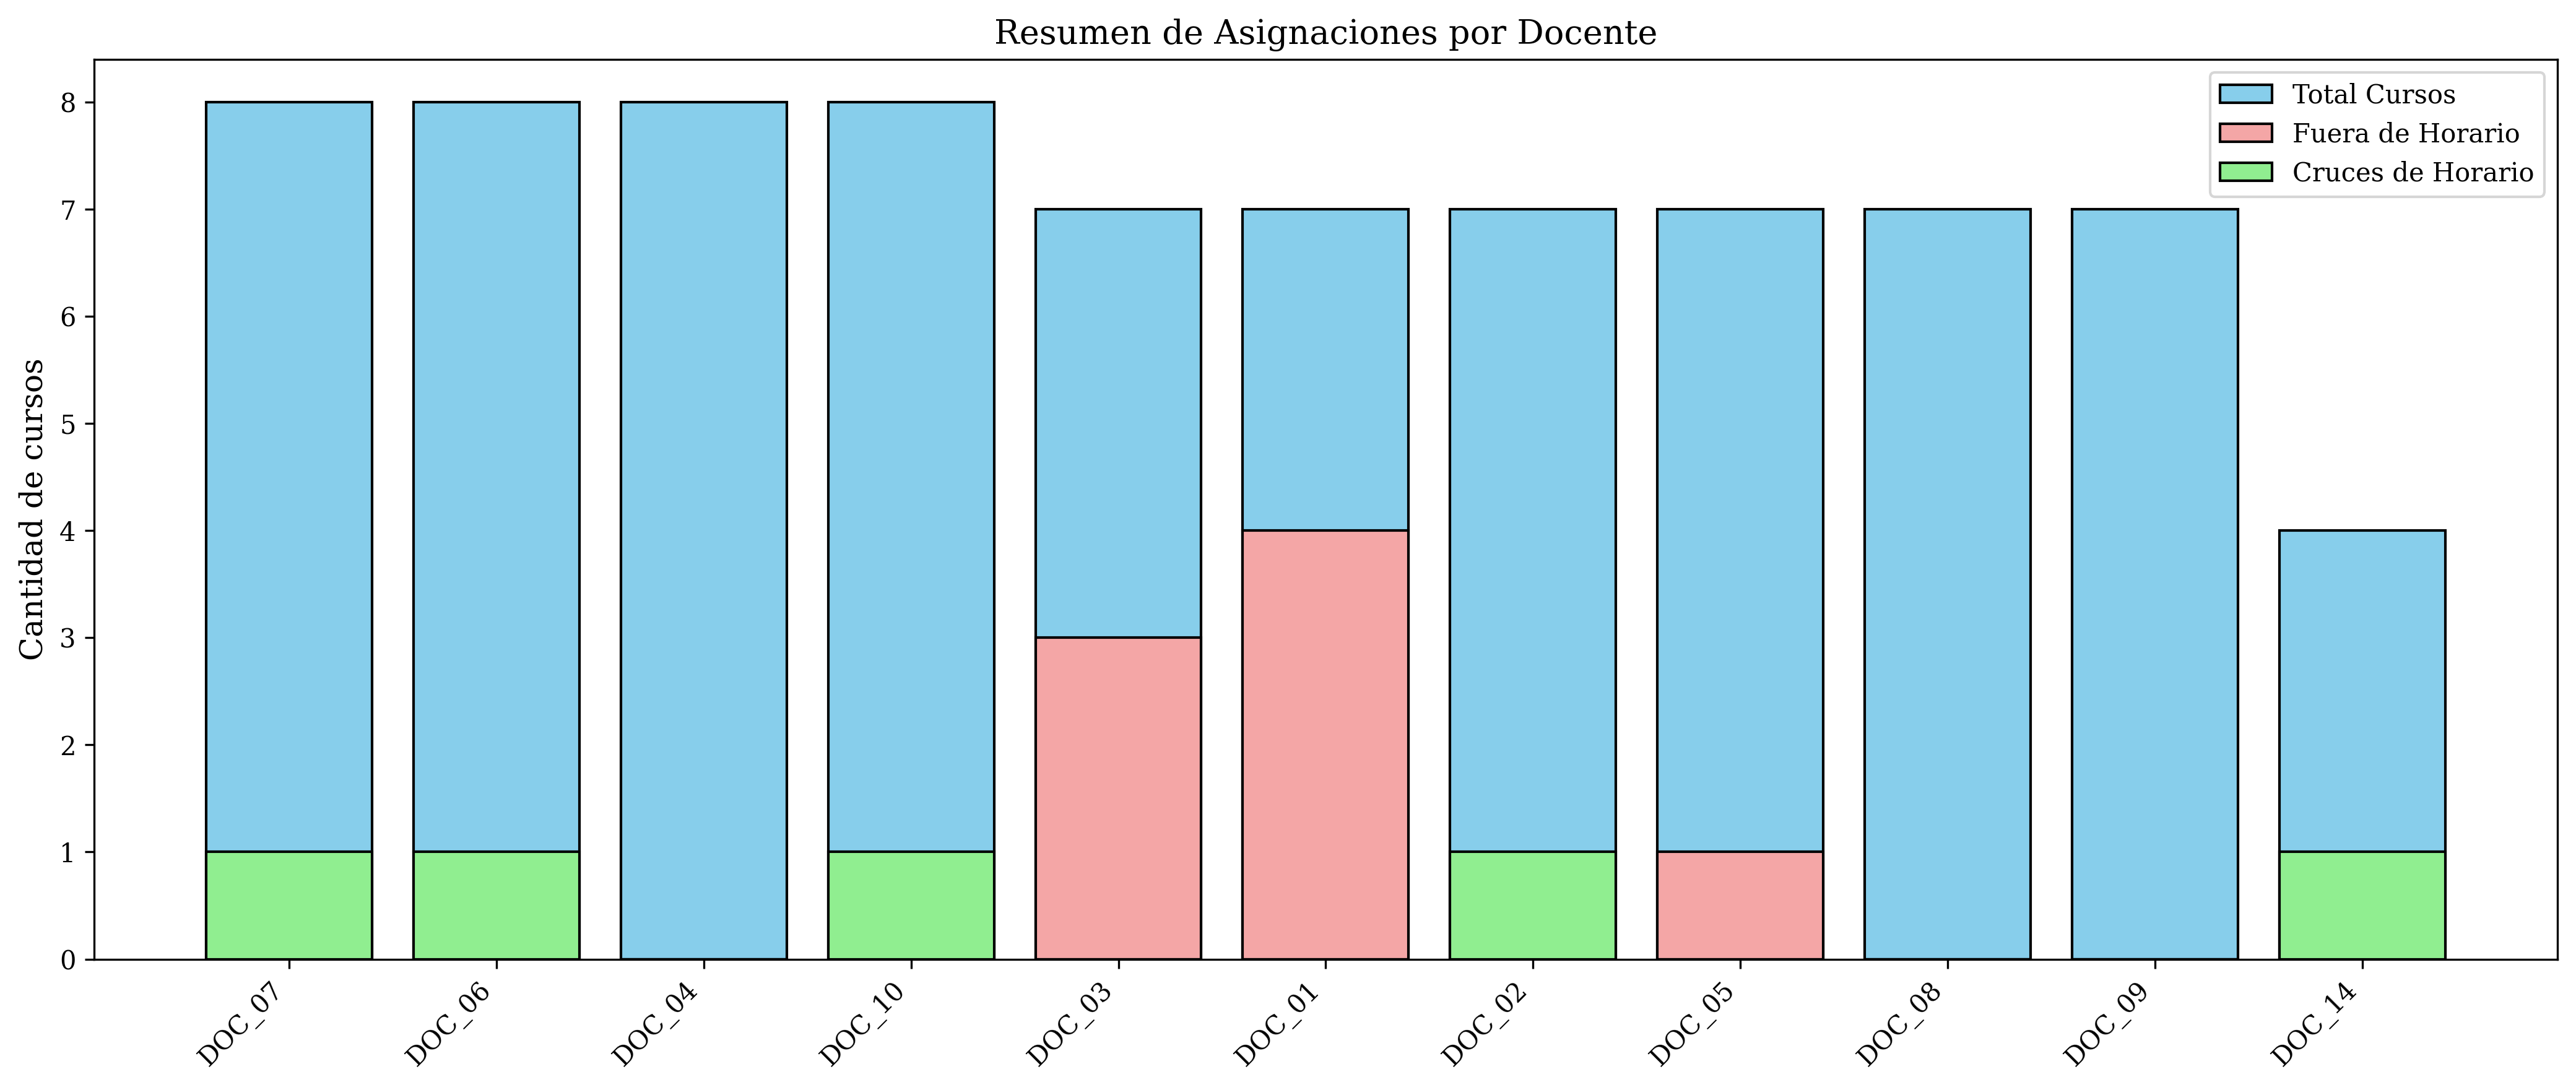

In [26]:
# Colores claros
color_total = '#87CEEB'         # SkyBlue
color_fuera_horario = '#F4A6A6' # Light red
color_cruces = '#90EE90'        # Light green

# Ordenar por número total de cursos
df_plot = df_reporte.sort_values('Total_Cursos', ascending=False)
profesores = df_plot['Profesor']
x = np.arange(len(profesores))

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Total de cursos (base de la barra)
ax.bar(x, df_plot['Total_Cursos'], label='Total Cursos', color=color_total, edgecolor='black')

# Fuera de horario (superpuesto en la barra base)
ax.bar(x, df_plot['Cursos_Fuera_Horario'], label='Fuera de Horario',
       color=color_fuera_horario, edgecolor='black')

# Cruces (superpuesto encima también)
ax.bar(x, df_plot['Cruces'], label='Cruces de Horario',
       color=color_cruces, edgecolor='black')

# Ajustes de etiquetas y formato
ax.set_xlabel('')
ax.set_ylabel('Cantidad de cursos')
ax.set_title('Resumen de Asignaciones por Docente')
ax.set_xticks(x)
ax.set_xticklabels(profesores, rotation=45, ha='right')
ax.legend(loc='upper right')
# ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
